In [ ]:
"""
========================================================
Author: Sevan Harootonian
Affiliation: Princeton University
========================================================
"""

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the preprocessed DataFrame
preprocessed = pd.read_pickle('data/preprocessed/exp3/preprocessed_exp3.pkl')
preprocessed_ci = preprocessed[preprocessed.group=='CI'].reset_index(drop=True) # congruent
preprocessed_ii = preprocessed[preprocessed.group=='II'].reset_index(drop=True) # incongruent

# Load the df_fits DataFrame
df_fits = pd.read_pickle('data/preprocessed/exp3/df_fits_exp3.pkl')

condition_labels = {
        "distractor": "Reward Scaffolding",
        "normal": "No Scaffolding",
        "scaffolding": "Inference Scaffolding"
    }

In [2]:
print('total N =',len(preprocessed.subjectId.unique())), 
preprocessed.groupby(['group', 'condition']).subjectId.unique().agg(list).apply(len)

total N = 759


C:\Users\skh\AppData\Local\Temp\ipykernel_31752\1363422077.py:2: FutureWarning: using <class 'list'> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  preprocessed.groupby(['group', 'condition']).subjectId.unique().agg(list).apply(len)


group  condition  
CI     distractor     122
       normal         130
       scaffolding    120
II     distractor     123
       normal         130
       scaffolding    134
Name: subjectId, dtype: int64

C:\Users\skh\AppData\Local\Temp\ipykernel_31752\1696052111.py:63: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.pointplot(
C:\Users\skh\AppData\Local\Temp\ipykernel_31752\1696052111.py:63: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
C:\Users\skh\AppData\Local\Temp\ipykernel_31752\1696052111.py:63: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
C:\Users\skh\AppData\Local\Temp\ipykernel_31752\1696052111.py:63: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(
C:\Users\skh\AppData\Local\Temp\ipykernel_31752\169

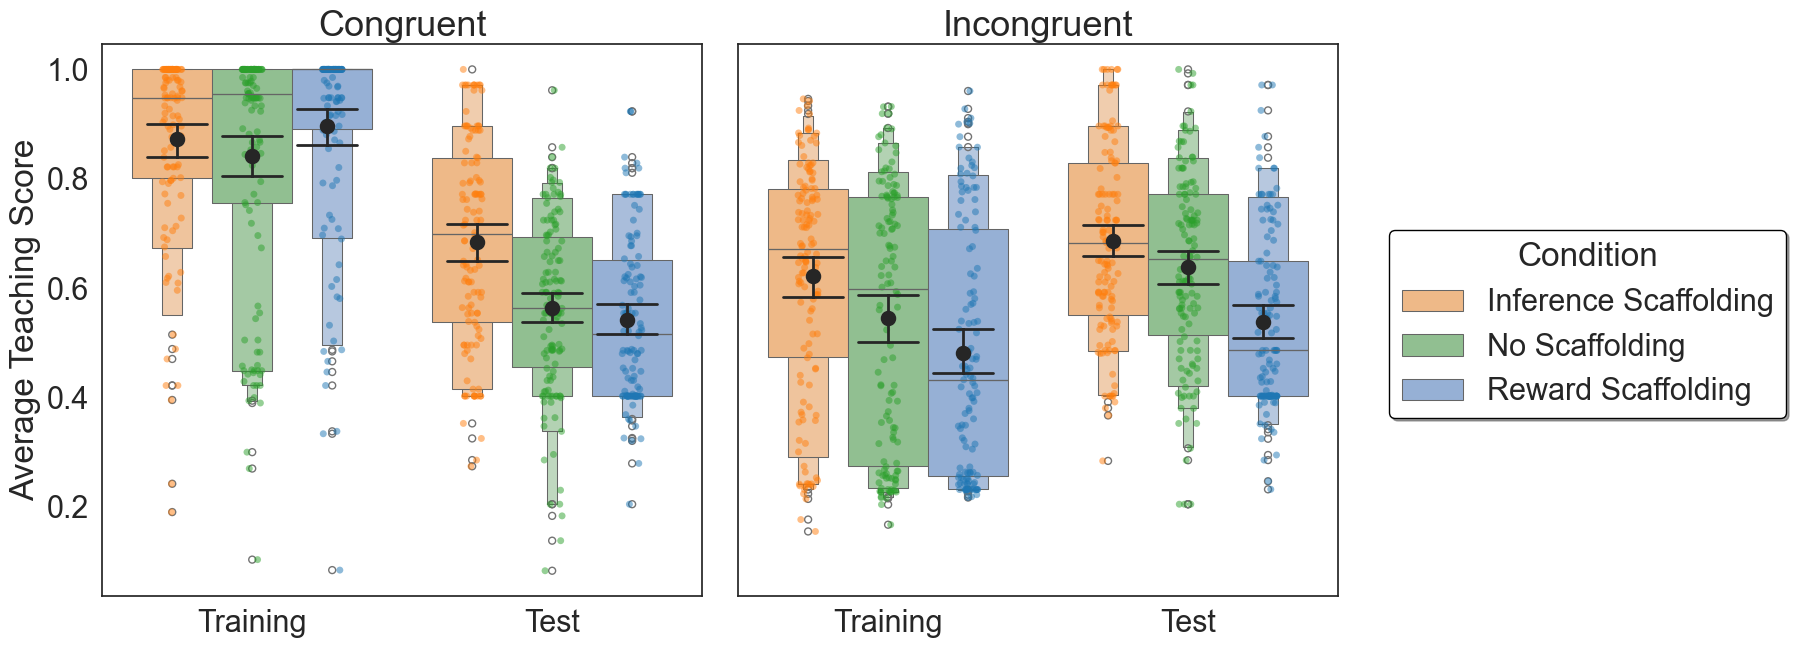

In [3]:
#Figure 5A

# Function to plot trial group barplots
def plot_trial_group_barplots(preprocessed_ii, preprocessed_ci):
    # Combine the datasets with a 'group' column to distinguish them
    preprocessed_ii['group_label'] = 'Incongruent'
    preprocessed_ci['group_label'] = 'Congruent'
    combined_data = pd.concat([preprocessed_ii, preprocessed_ci])

    plotdata = combined_data.groupby(['subjID', 'block', 'condition', 'group_label'])['edge_normresp_U_obm'].mean().reset_index()
    order = ['training', 'test']
    hue_order = ['scaffolding', 'normal', 'distractor']
    
    # Define color palettes
    palette_soft = {
        "distractor": "#8CAEDF",
        "scaffolding": "#FFB877",
        "normal": "#89C789"
    }
    
    palette = {
        "distractor": "#1f77b4",
        "scaffolding": "#ff7f0e",
        "normal": "#2ca02c"
    }
    
    sns.set(style="white", font_scale=2)
    fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

    for i, group in enumerate(['Congruent', 'Incongruent']):
        group_data = plotdata[plotdata['group_label'] == group]
        
        g = sns.boxenplot(
            x='block',
            y='edge_normresp_U_obm',
            hue='condition',
            data=group_data,
            ax=ax[i],
            dodge=True,
            order=order,
            hue_order=hue_order,
            palette=palette_soft,
        )
        
        sns.stripplot(
            x="block",
            y='edge_normresp_U_obm',
            hue="condition",
            data=group_data,
            ax=ax[i],
            palette=palette,
            dodge=True,
            s=5,
            marker="o",
            linewidth=0,
            alpha=.5,
            # legend=False,
            order=order,
            hue_order=hue_order,
            zorder=1
        )
        
        sns.pointplot(
            x='block',
            y='edge_normresp_U_obm',
            hue='condition',
            data=group_data,
            ax=ax[i],
            dodge=.5,
            order=order,
            hue_order=hue_order,
            estimator=np.mean,
            n_boot=1000,
            join=False,
            palette=sns.dark_palette("black", n_colors=1),
            markers="o",
            scale=1.5,
            errwidth=2,
            capsize=0.2,
        )

        if i == 1:
            ax[i].set_ylabel('')
        else:
            ax[i].set_ylabel('Average Teaching Score')
            
        ax[i].set_xlabel('')
        ax[i].set_xticklabels(['Training', 'Test'])
        ax[i].set_title(group, fontsize=26)
        ax[i].legend().remove()
    handles, labels = ax[0].get_legend_handles_labels()
    condition_counts = preprocessed_ii.groupby('condition')['subjID'].nunique()
    condition_counts.update(preprocessed_ci.groupby('condition')['subjID'].nunique())
    new_labels = [f"{condition_labels[label]}" for label in labels[:len(hue_order)]]
    fig.legend(handles[:len(hue_order)], new_labels, title='Condition', loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, shadow=True, facecolor='white', edgecolor='black')

    plt.tight_layout()
    plt.show()

plot_trial_group_barplots(preprocessed_ii, preprocessed_ci)


C:\Users\skh\AppData\Local\Temp\ipykernel_31752\3090860008.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Congruent', 'Incongruent'], fontsize=16)


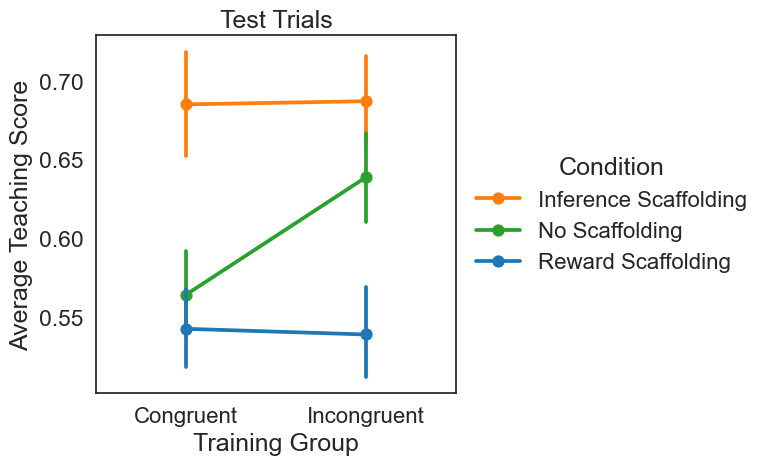

In [4]:
#figure 5B

def plot_group_test(preprocessed):   
    plotdata = preprocessed[preprocessed.block == 'test'].groupby(['subjID', 'group', 'condition'])['edge_normresp_U_obm'].mean().reset_index()
    hue_order = ['scaffolding', 'normal','distractor']
    x_order = ['CI', 'II']
        
    # Update the condition labels in plotdata
    plotdata['condition'] = plotdata['condition'].replace(condition_labels)
    
    # Update hue_order to match new labels
    hue_order = [condition_labels[label] for label in hue_order]
    
    sns.set(style="white", font_scale=1.5)
    fig, ax = plt.subplots(figsize=(8, 5))
    
    palette = {"Reward Scaffolding": "#1f77b4", "Inference Scaffolding": "#ff7f0e", "No Scaffolding": "#2ca02c"}
    
    # Plot with the custom palette
    g = sns.pointplot(
        x='group',
        y='edge_normresp_U_obm',
        hue='condition',
        data=plotdata,
        ax=ax,
        order=x_order,  # Ensure the x-axis categories appear in the specified order
        errorbar=('ci', 95), 
        hue_order=hue_order,
        palette=palette  # Use the custom color palette
    )

    # Adjust plot appearance
    g.set_xlabel('Training Group', size=18)
    g.set_ylabel('Average Teaching Score', size=18)
    g.set_title('Test Trials')
    g.set_xticklabels(['Congruent', 'Incongruent'], fontsize=16)
    g.set_axisbelow(True)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, title='Condition', frameon=True, fontsize=16, framealpha=0, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Remove gridlines
    g.grid(False)
    
    plt.tight_layout()

plot_group_test(preprocessed)

In [5]:
# u-tests
from scipy.stats import mannwhitneyu

# Function to perform Mann-Whitney U test and print results
def mann_whitney_u_test_group(data, group1, group2, condition, title):
    group1_data = data[(data['group'] == group1) & (data['condition'] == condition)]['edge_normresp_U_obm']
    group2_data = data[(data['group'] == group2) & (data['condition'] == condition)]['edge_normresp_U_obm']
    
    u_stat, p_value = mannwhitneyu(group1_data, group2_data)
    
    print(f"{title}:")
    print(f"Mann-Whitney U test statistic: {u_stat}")
    print(f"P-value: {p_value}\n")

def mann_whitney_u_test_cond(data, group, condition1,condition2, title):
    group1_data = data[(data['group'] == group) & (data['condition'] == condition1)]['edge_normresp_U_obm']
    group2_data = data[(data['group'] == group) & (data['condition'] == condition2)]['edge_normresp_U_obm']
    
    u_stat, p_value = mannwhitneyu(group1_data, group2_data)
    
    print(f"{title}:")
    print(f"Mann-Whitney U test statistic: {u_stat}")
    print(f"P-value: {p_value}\n")

test_data_subj = preprocessed[preprocessed.block == 'test'].groupby(['subjID', 'group', 'condition'])['edge_normresp_U_obm'].mean().reset_index()

# Perform Mann-Whitney U tests
mann_whitney_u_test_group(test_data_subj, 'CI', 'II', 'scaffolding', 'Inference-Scaffolding between Congruent and Incongruent')
mann_whitney_u_test_group(test_data_subj, 'CI', 'II', 'normal', 'No-Scaffolding between Congruent and Incongruent')
mann_whitney_u_test_group(test_data_subj, 'II', 'CI', 'distractor', 'Reward-Scaffolding between Incongruent and Congruent')

mann_whitney_u_test_cond(test_data_subj, 'CI', 'scaffolding', 'normal', 'between Inference-Scaffolding  and No-Scaffolding in Congruent')
mann_whitney_u_test_cond(test_data_subj, 'CI', 'normal', 'distractor', 'between No-Scaffolding and Reward-Scaffolding in Congruent')

mann_whitney_u_test_cond(test_data_subj, 'II', 'scaffolding', 'normal', 'between Inference-Scaffolding  and No-Scaffolding in Incongruent')
mann_whitney_u_test_cond(test_data_subj, 'II', 'normal', 'distractor', 'between No-Scaffolding and Reward-Scaffolding in Incongruent')

Inference-Scaffolding between Congruent and Incongruent:
Mann-Whitney U test statistic: 8074.5
P-value: 0.9535945162121169

No-Scaffolding between Congruent and Incongruent:
Mann-Whitney U test statistic: 6377.0
P-value: 0.0006288704736156387

Reward-Scaffolding between Incongruent and Congruent:
Mann-Whitney U test statistic: 7228.5
P-value: 0.6193278774695448

between Inference-Scaffolding  and No-Scaffolding in Congruent:
Mann-Whitney U test statistic: 10575.0
P-value: 1.1806827314611227e-06

between No-Scaffolding and Reward-Scaffolding in Congruent:
Mann-Whitney U test statistic: 8889.0
P-value: 0.09690942819871948

between Inference-Scaffolding  and No-Scaffolding in Incongruent:
Mann-Whitney U test statistic: 9828.5
P-value: 0.07141516580909095

between No-Scaffolding and Reward-Scaffolding in Incongruent:
Mann-Whitney U test statistic: 10738.5
P-value: 2.363124241123399e-06



C:\Users\skh\AppData\Local\Temp\ipykernel_31752\2163585818.py:60: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_diff = data.pivot_table(index=['subjID', 'condition_group'], columns='model', values='BIC').reset_index()
C:\Users\skh\AppData\Local\Temp\ipykernel_31752\2163585818.py:68: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  pp = sns.pointplot(
C:\Users\skh\AppData\Local\Temp\ipykernel_31752\2163585818.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(condition_order, fontsize=14)


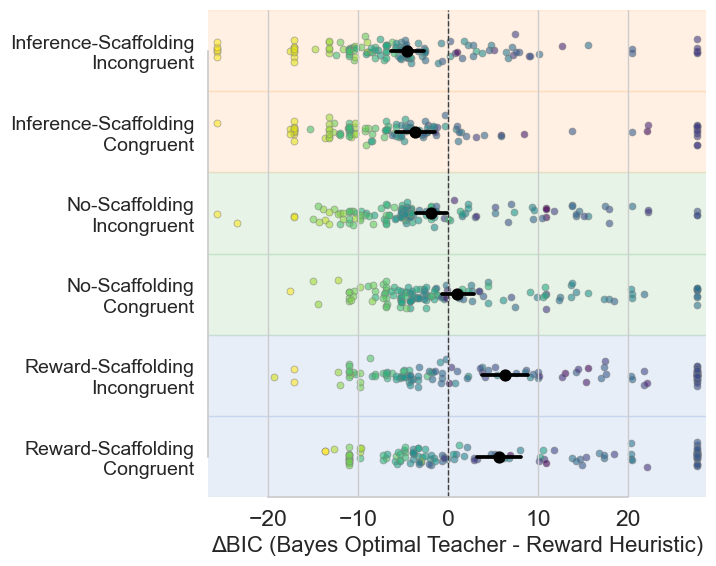

In [6]:
#figure 6

#### compute teaching score colors 
from matplotlib.colors import Normalize, to_hex
# Group the data by group, subjID, block, and condition
grouped_data = preprocessed.groupby(["group", "subjID", "block", "condition"]).edge_normresp_U_obm.sum().reset_index()

# Function to assign colors based on edge_normresp_U_obm value within each subgroup
def assign_colors(data):
    data = data.copy()
    cmap = sns.color_palette("viridis", as_cmap=True)
    # cmap = LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])
    norm = Normalize(data['edge_normresp_U_obm'].min(), data['edge_normresp_U_obm'].max())
    data['color'] = data['edge_normresp_U_obm'].apply(lambda x: to_hex(cmap(norm(x))))
    return data

# Apply the function to each subgroup
grouped_data['color'] = ''
for (group, block, condition), sub_data in grouped_data.groupby(['group', 'block', 'condition']):
    colored_sub_data = assign_colors(sub_data)
    grouped_data.loc[colored_sub_data.index, 'color'] = colored_sub_data['color']


models = df_fits.model.unique()
plotdf = df_fits[df_fits.model.isin(models)]

plotdf['color'] = ''
plotdf['BIC'] = ''
for i, row in plotdf.iterrows():

    plotdf.at[i, 'BIC'] = np.log(5) * 1 + 2 * row.nll
    
    subj = row['subjID']
    condition = row['condition']
    group = row['group']
    plotdf.at[i, 'color'] = grouped_data[(grouped_data['subjID'] == subj) & 
                                                 (grouped_data['condition'] == condition) & 
                                                 (grouped_data['group'] == group)&
                                                 (grouped_data['block'] == 'test')]['color'].values[0]
#### #figure 6 plotting
# Define the function to create the combined plot
def create_combined_plot(data):
    sns.set(style="whitegrid", font_scale=1.5)
    fig, ax = plt.subplots(figsize=(7.5, 6))  # Adjusted height for compact y-axis
    
    # Define the order of the categories
    condition_order = [
        'Reward-Scaffolding\nCongruent', 'Reward-Scaffolding\nIncongruent', 
        'No-Scaffolding\nCongruent', 'No-Scaffolding\nIncongruent', 
        'Inference-Scaffolding\nCongruent', 'Inference-Scaffolding\nIncongruent'
    ]
    
    data['condition'] = data['condition'].replace(condition_labels)
    data['group'] = data['group'].replace({'CI': 'Congruent', 'II': 'Incongruent'})
    data['condition_group'] = data['condition'] + '\n' + data['group']
    data['condition_group'] = data['condition_group'].astype('category')
    data['condition_group'] = data['condition_group'].cat.set_categories(condition_order, ordered=True)
    
    # Calculate BIC difference as OBM - Reward
    data_diff = data.pivot_table(index=['subjID', 'condition_group'], columns='model', values='BIC').reset_index()
    data_diff['BIC_diff'] = data_diff['OBM'] - data_diff['Reward']

    # Merge back colors from the original dataframe
    color_map = data[['subjID', 'condition_group', 'color']].drop_duplicates()
    data_diff = data_diff.merge(color_map, on=['subjID', 'condition_group'], how='left')

    # Plot pointplot with error bars
    pp = sns.pointplot(
        y="condition_group", x="BIC_diff", data=data_diff, errorbar=('ci', 95), 
        join=False, estimator=np.mean, n_boot=10000, color='black', markers="o",
        order=condition_order
    )
    
    # Add jittered scatter points with colors
    for i, row in data_diff.iterrows():
        jitter = np.random.normal(0, 0.07)  # Add jitter to y-coordinate
        plt.scatter(row['BIC_diff'], condition_order.index(row['condition_group']) + jitter, 
                    color=row['color'], alpha=0.6, s=25, zorder=0,    edgecolors='grey',linewidth=0.6)

    # Background colors for separation
    palette_soft = {
        "Reward-Scaffolding": "#8CAEDF",
        "Inference-Scaffolding": "#FFB877",  
        "No-Scaffolding": "#89C789"      
    }
    for i, condition in enumerate(condition_order):
        if 'Reward-Scaffolding' in condition:
            color = palette_soft["Reward-Scaffolding"]
        elif 'Inference-Scaffolding' in condition:
            color = palette_soft["Inference-Scaffolding"]
        elif 'No-Scaffolding' in condition:
            color = palette_soft["No-Scaffolding"]
        else:
            color = 'white'
        plt.gca().add_patch(plt.Rectangle((min(data_diff['BIC_diff']) - 5, i - 0.5), 
                                          max(data_diff['BIC_diff']) - min(data_diff['BIC_diff']) + 10, 1, 
                                          color=color, alpha=0.2, zorder=-2))


    ax.set_yticklabels(condition_order, fontsize=14)
    ax.set_ylim(-0.5, len(condition_order) - 0.5)  # Add padding to the y-axis limits to avoid cutting off points
    ax.set_xlim(data_diff['BIC_diff'].min() - 1, data_diff['BIC_diff'].max() + 1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.set_xlabel('ΔBIC (Bayes Optimal Teacher - Reward Heuristic)', fontsize=16)
    ax.set_ylabel('')
    plt.tight_layout()
    sns.despine(trim=True)
    plt.show()



# Ensure plotdf is already created and updated with colors
plotdf2 = plotdf.copy()
plotdf2['condition'] = plotdf2['condition'].replace({'distractor': 'Reward-Scaffolding', 'normal': 'No-Scaffolding', 'scaffolding': 'Inference-Scaffolding'})
plotdf2['group'] = plotdf2['group'].replace({'CI': 'Congruent', 'II': 'Incongruent'})
plotdf2['condition_group'] = plotdf2['condition'] + '\n' + plotdf['group']

# Create the combined plot
create_combined_plot(plotdf2)

#save as pdf


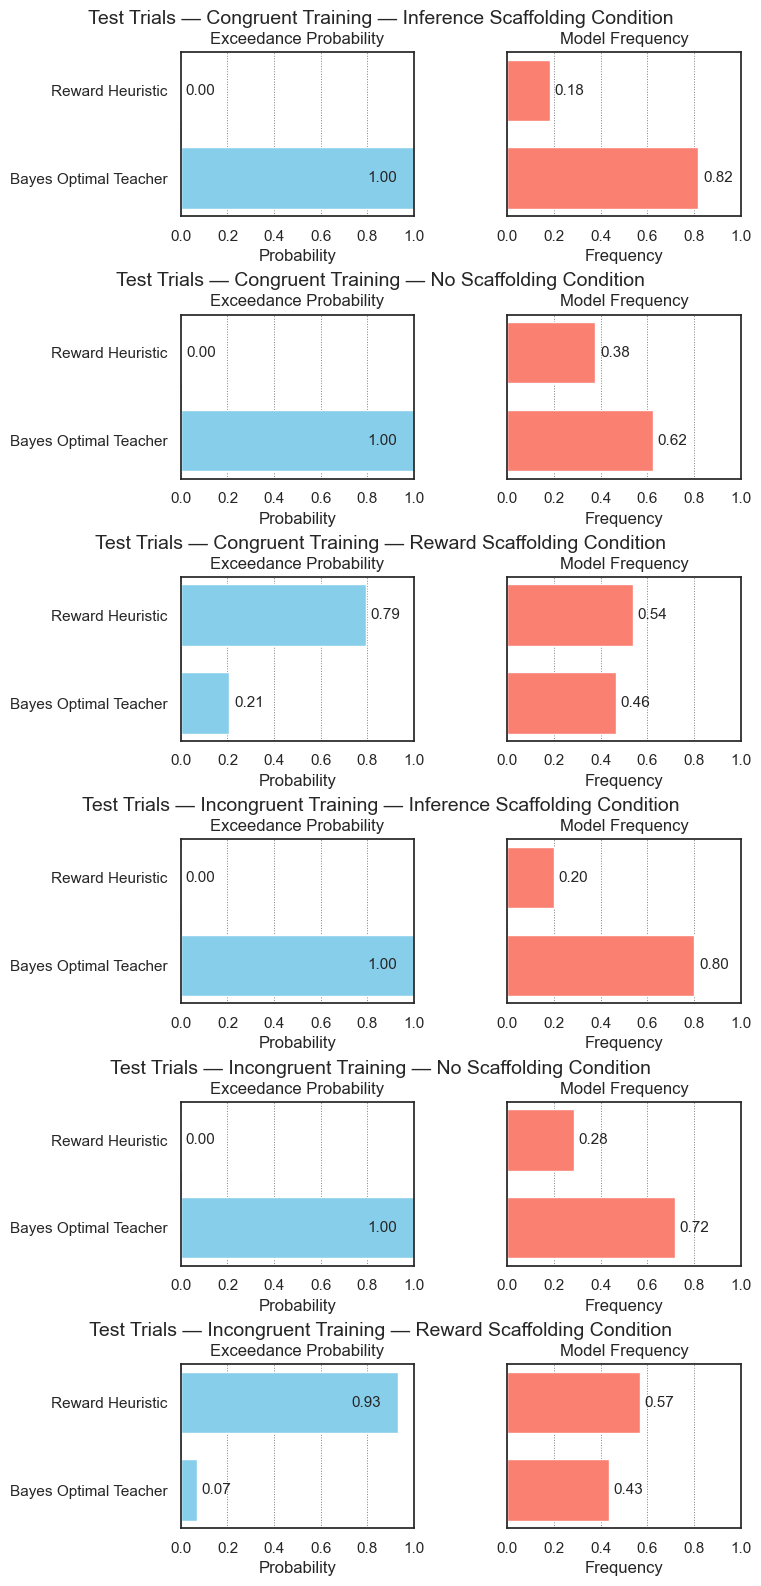

In [7]:
from functions.model_comparison import *


rename_group_map = {
    "CI": "Congruent",
    "II": 'Incongruent',
}
df_fits['group'] = df_fits['group'].replace(rename_group_map)

model_name_mapping = {
    "OBM": "Bayes Optimal Teacher",
    "Reward": "Reward Heuristic",
}
df_fits['model'] = df_fits['model'].replace(model_name_mapping)

condition_labels = {
        "distractor": "Reward Scaffolding",
        "normal": "No Scaffolding",
        "scaffolding": "Inference Scaffolding"
    }
df_fits['condition'] = df_fits['condition'].replace(condition_labels)

model_order = [
    'Bayes Optimal Teacher',
    'Reward Heuristic',
]

sns.set(style="white", font_scale=1)
fig, axes = plot_vb_exp(df_fits, 
                        exp=3, 
                        group_col='group', 
                        condition_col='condition', 
                        model_order=['Bayes Optimal Teacher', 'Reward Heuristic'],figsize_per_row=(8,3)
                        )
plt.show()


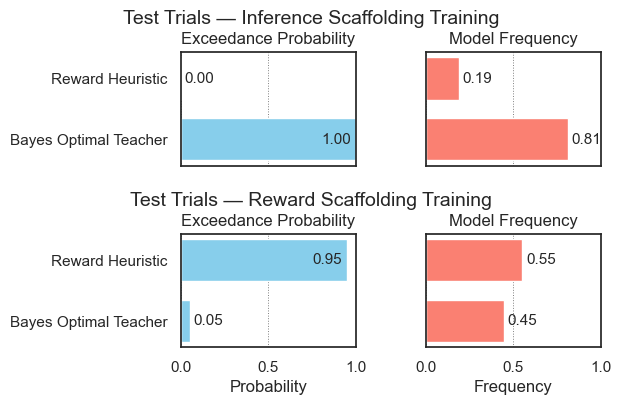

In [8]:
from functions.model_comparison import *

rename_group_map = {
    "CI": "Congruent",
    "II": 'Incongruent',
}
plotdf['group'] = plotdf['group'].replace(rename_group_map)


model_order = [
    'Bayes Optimal Teacher',
    'Reward Heuristic',
]
df_fits_only_scaff = df_fits[df_fits.condition != 'No Scaffolding'].reset_index(drop=True)
sns.set(style="white", font_scale=1)
fig, axes = plot_vb_exp(df_fits_only_scaff, 
                        exp=2, 
                        group_col='condition', 
                        # condition_col='condition', 
                        model_order=['Bayes Optimal Teacher', 'Reward Heuristic'],hide_top_xlabels=True,
                        figsize_per_row=(6,1.8)
                        )
# plt.tight_layout()
plt.show()



In [9]:
simdata = pd.DataFrame(pd.read_pickle('data/sim/exp3/exp3_modelsim.pickle'))
rename_simdata_map = {
    "PathAvgUtility": 'Path Avg Utility',
    "feature_levels": "Depth Heuristic",
    "feature_reward_sum": "Reward Heuristic",
    "OBM_AU": "Bayes Optimal Teacher",
    "NBM_AU": "No Inv. Plan. Bayes Teacher",
    "POM_AU": "Prior-only Bayes Teacher",
}
simdata.rename(columns=rename_simdata_map, inplace=True)

posterior_sim = pd.read_pickle('data/sim/exp3/exp3_posterior_sim_100.pkl')
rename_posterior_sim_map = {
    "Q-values": "Q-values",
    "PathAvgUtility": 'Path Avg. Utility',
    "Level": "Depth Heuristic",
    "Reward": "Reward Heuristic",
    'Level,Reward': 'Reward & Depth Heuristic',
    "OBM": "Bayes Optimal Teacher",
    "NBM": "No Inv. Plan. Bayes Teacher",
    "POM": "Prior-only Bayes Teacher",
}
posterior_sim['sim_model'] = posterior_sim['sim_model'].replace(rename_posterior_sim_map)

sim_fits = pd.read_pickle("data/sim/exp3/exp3_simfits_100.pkl")
sim_fits['sim_model'] = sim_fits['sim_model'].replace(rename_posterior_sim_map)
sim_fits['fit_model'] = sim_fits['fit_model'].replace(rename_posterior_sim_map)



preprocessed['group'] = preprocessed['group'].replace(rename_group_map)
groups = dict(df_fits.groupby('group').subjID.unique())
sim_fits['group'] = ''
posterior_sim['group'] = ''
for key in groups:
    sim_fits.loc[sim_fits['subjID'].isin(groups[key]), 'group'] = key
    posterior_sim.loc[posterior_sim['subjID'].isin(groups[key]), 'group'] = key

preprocessed['condition'] = preprocessed['condition'].replace(condition_labels)  
condition = dict(df_fits.groupby('condition').subjID.unique())
sim_fits['condition'] = ''
posterior_sim['condition'] = ''    
for key in condition:
    sim_fits.loc[sim_fits['subjID'].isin(condition[key]), 'condition'] = key
    posterior_sim.loc[posterior_sim['subjID'].isin(condition[key]), 'condition'] = key

In [10]:
# Find the row index with the min BIC per subjID
idx = df_fits.groupby(["subjID",'group'])["BIC"].idxmin()

# # Use those indices to get the rows
best_models = df_fits.loc[idx].reset_index(drop=True)

merged = posterior_sim.merge(
    best_models,
    left_on=["subjID", "sim_model"],
    right_on=["subjID", "model"],
    how="inner"
)

best_models.groupby(['model','condition','group']).BIC.size()

model                  condition              group      
Bayes Optimal Teacher  Inference Scaffolding  Congruent       95
                                              Incongruent    101
                       No Scaffolding         Congruent       84
                                              Incongruent     91
                       Reward Scaffolding     Congruent       62
                                              Incongruent     58
Reward Heuristic       Inference Scaffolding  Congruent       25
                                              Incongruent     33
                       No Scaffolding         Congruent       46
                                              Incongruent     39
                       Reward Scaffolding     Congruent       60
                                              Incongruent     65
Name: BIC, dtype: int64

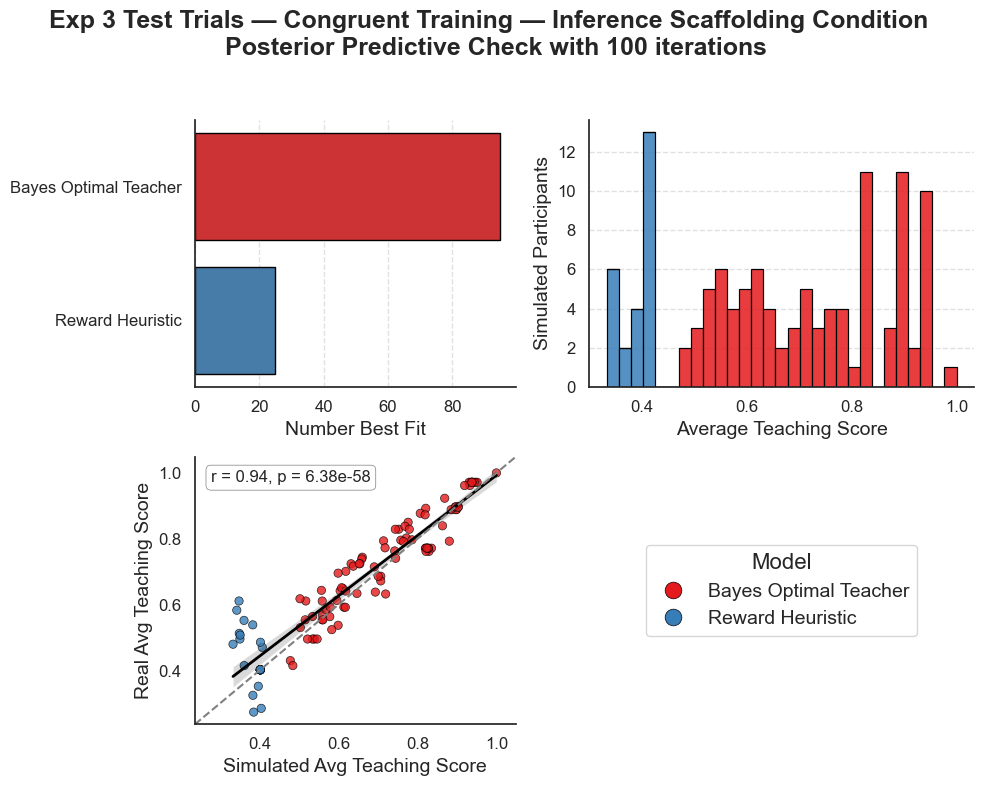

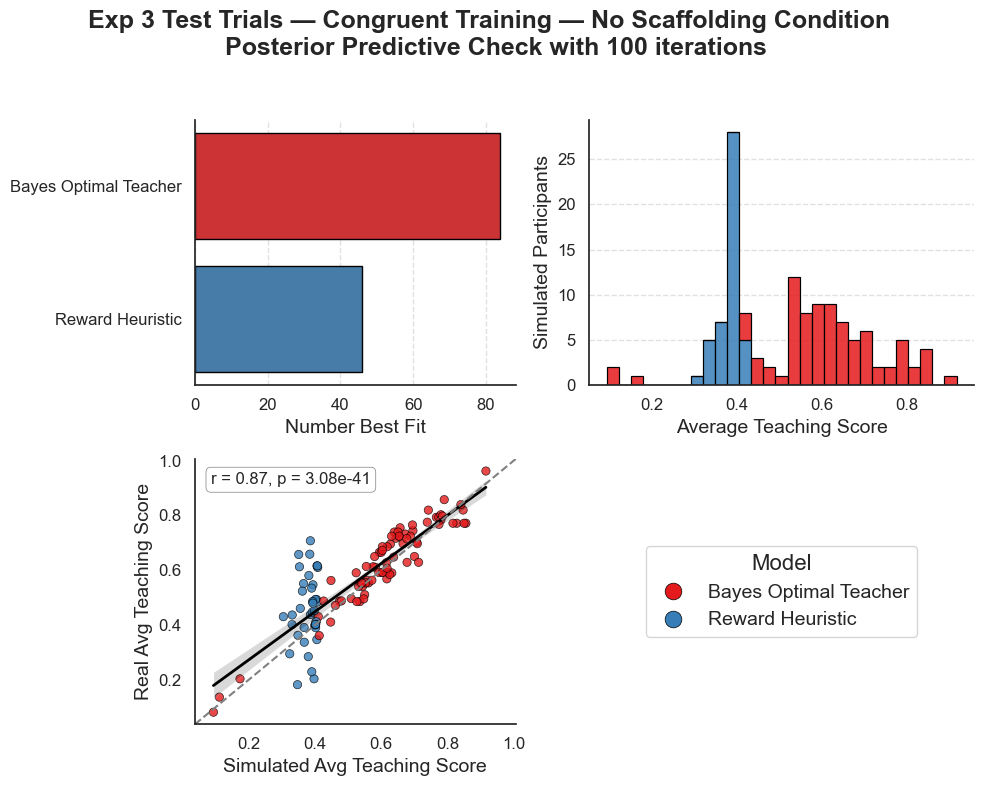

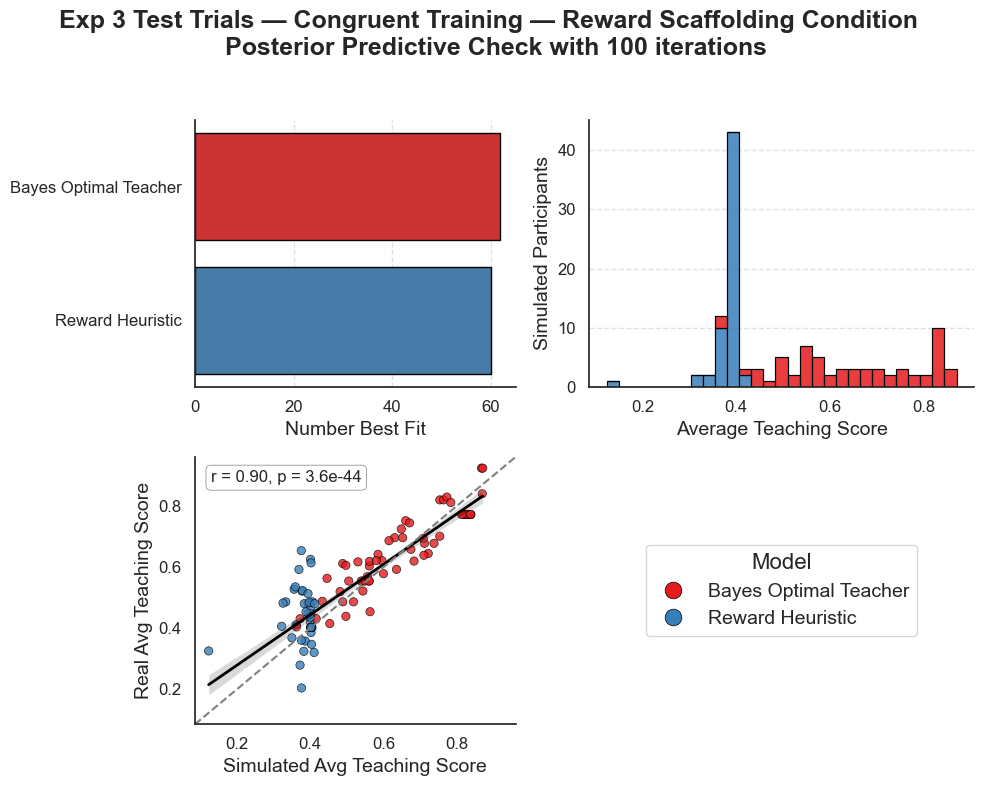

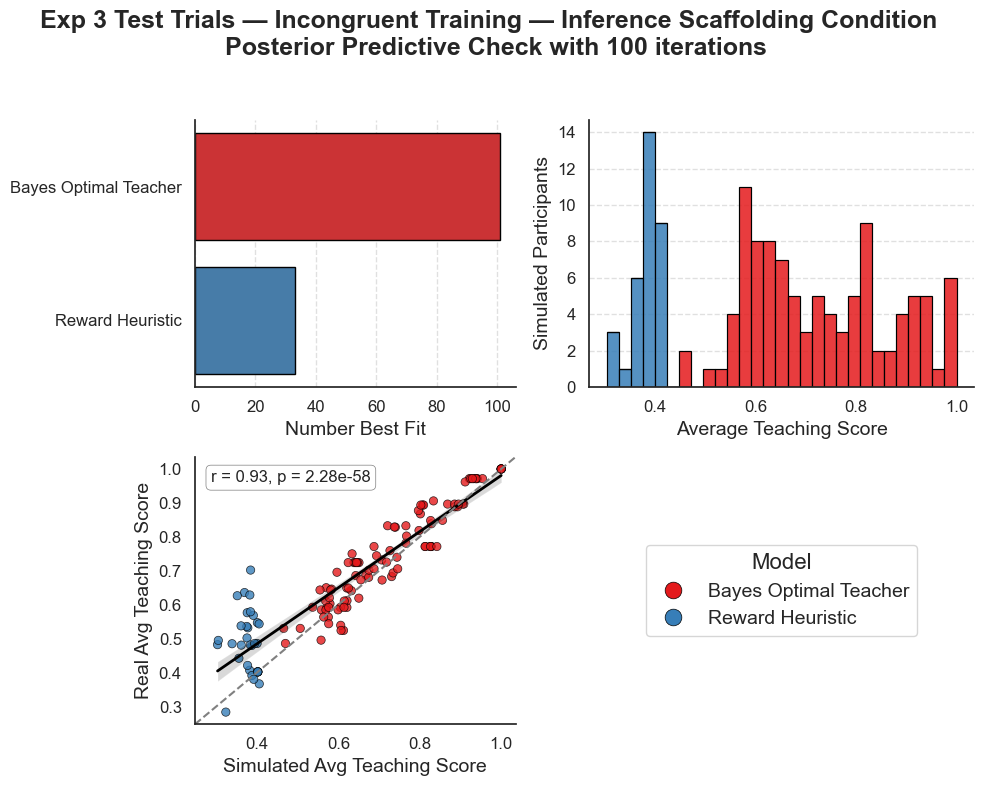

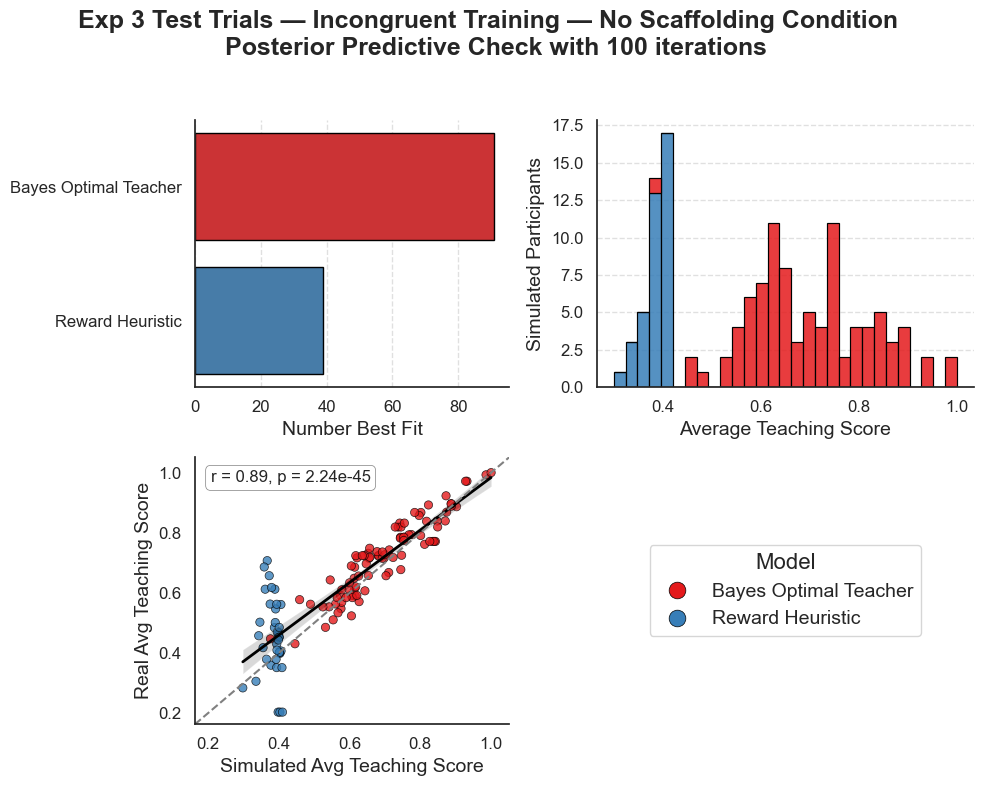

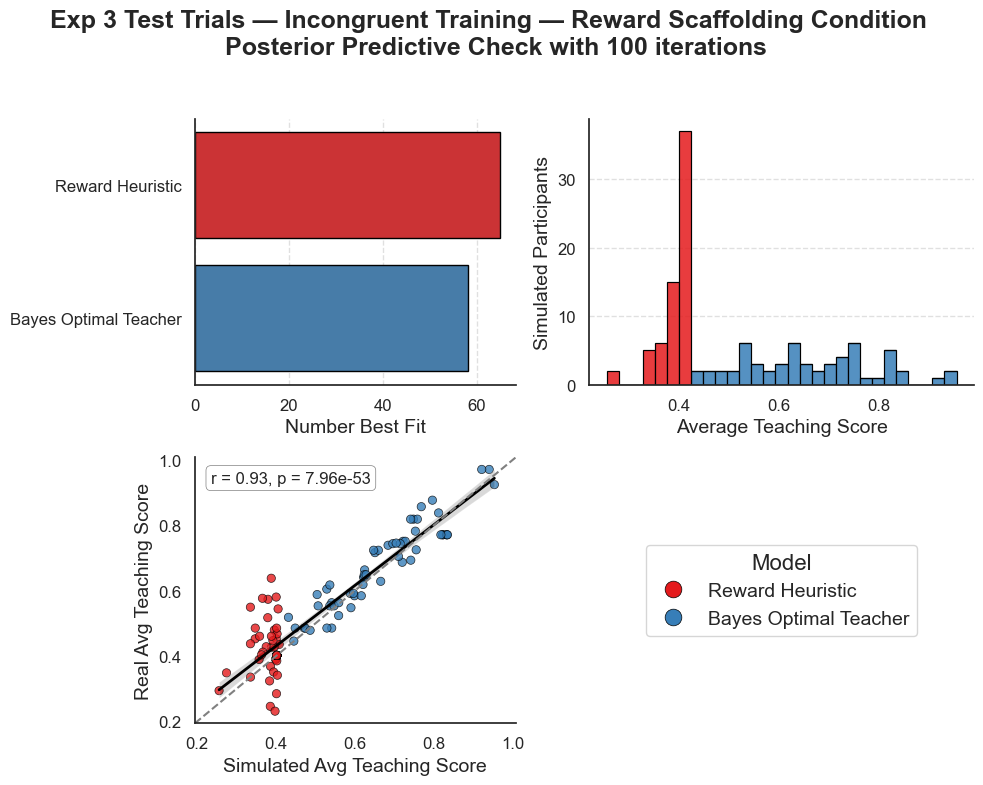

In [11]:
ids_by_gc = (
    best_models
    .groupby(['group', 'condition'], dropna=False)['subjID']
    .unique()
    .sort_index()
)

figs_e3 = {}
for (g, c), ids in ids_by_gc.items():
    # subset both frames to this group×condition
    bm_gc = best_models[(best_models['group'] == g) & (best_models['condition'] == c)]
    if 'condition' in merged.columns:
        mrg_gc = merged[(merged['subjID'].isin(ids)) & (merged['condition'] == c)]
    else:
        mrg_gc = merged[merged['subjID'].isin(ids)]  # fallback if merged lacks 'condition'

    real_df = preprocessed.loc[preprocessed.block == 'test', ['subjID', 'edge_normresp_U_obm']].reset_index(drop=True)

    figs_e3[(g, c)], _ = run_ppc_for_ids(
        bm_gc, mrg_gc, ids,
        real_df=real_df,
        real_score_col="edge_normresp_U_obm",
        title_prefix=f"Exp 3 Test Trials — {g} Training — {c} Condition",
        figsize=(10, 8)
    )

plt.show()


Overall recovery (diagonal) = 0.807  [122503/151800]


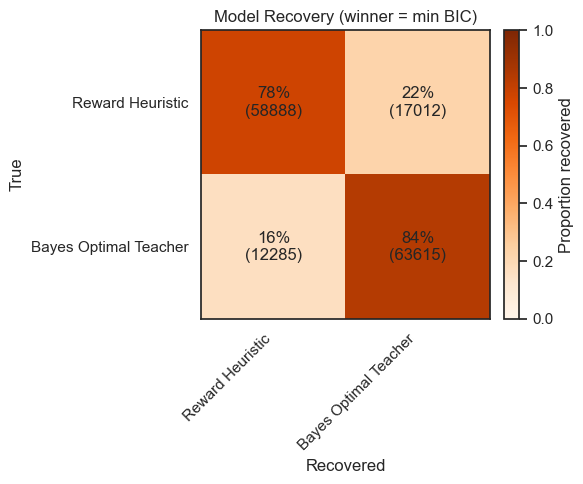

In [12]:
model_order = [
    "Reward Heuristic",
    "Bayes Optimal Teacher",
]
counts, props, fig = model_recovery_plot(sim_fits, metric="BIC", order=model_order)



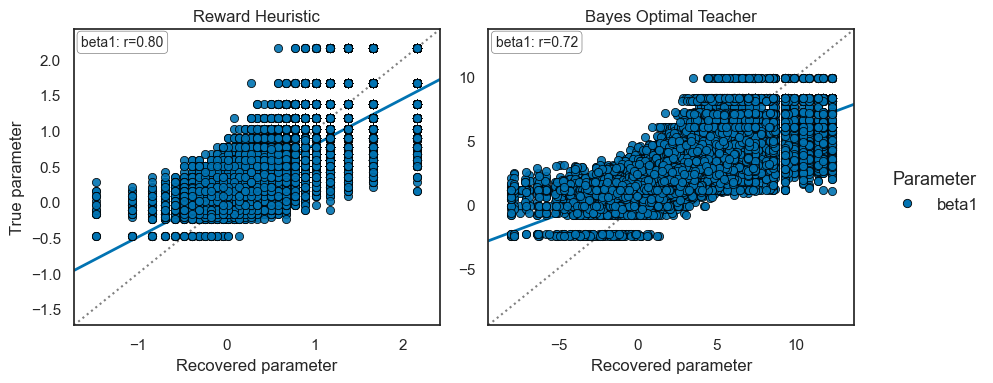

In [13]:
param_long = build_param_recovery_long(true_df=df_fits,  # your “true betas” df
                                       sim_fits_all=sim_fits)
param_long_plot = filter_param_outliers(
    param_long,
    method="mad",        # robust default
    mad_thresh=4.5,      # slightly stricter than 4.0; adjust as you like
    iqr_k=3.0            # 'extreme' Tukey fence fallback
)

fig, axes = plot_param_recovery_grid(
    param_long_plot,
    model_order=[
        "Reward Heuristic",
         "Bayes Optimal Teacher",
    ],
    ncols=2,
    pad=0.07,
    clip_quantiles=None,         # or (0.01, 0.99) if needed
    # model_title_map=model_title_map
)
plt.show()


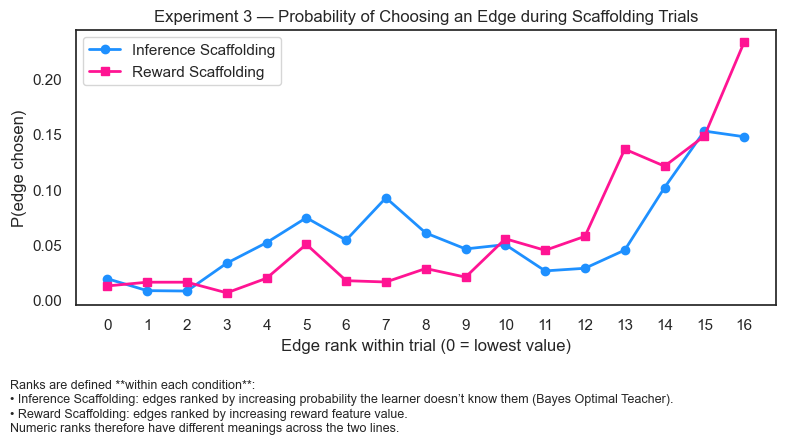

In [ ]:

# simdata_exp3 = pd.DataFrame(pd.read_pickle('data/sim/exp3_modelsim.pickle'))
# ---------------------------------------------------------------
# 0.  Imports
# ---------------------------------------------------------------
import pandas as pd, numpy as np, ast
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# ---------------------------------------------------------------
# 1.  Coerce the dict‑like strings in simdata_exp3
# ---------------------------------------------------------------
def to_dict_safe(x):
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            return v if isinstance(v, dict) else None
        except Exception:
            return None
    return None

for col in ['inf_prob', 'feature_reward']:
    simdata[col] = simdata[col].apply(to_dict_safe)

# ---------------------------------------------------------------
# 2.  Helpers
# ---------------------------------------------------------------
def sort_dict(d):
    return sorted(d.items(), key=lambda kv: kv[1]) if d else []

def build_sorted_lookup(df, value_col):
    """trial_id → [(edge, value)…]  sorted ascending by value"""
    return {
        tid: sort_dict(val_dict)
        for tid, val_dict in zip(df['trial_id'], df[value_col])
        if isinstance(val_dict, dict) and val_dict
    }

def choice_prob_by_rank(df_slice, lookup):
    """Return ranks array & probability of choosing an edge at each rank."""
    counts = Counter()
    total  = 0

    for tid, edges in zip(df_slice['trial_id'], df_slice['inference_edge']):
        if (tid not in lookup) or not isinstance(edges, list):
            continue
        keys = [k for k, _ in lookup[tid]]

        for e in edges:
            if e in keys:
                r = keys.index(e)
                counts[r] += 1
                total     += 1

    ranks = np.array(sorted(counts.keys()))
    probs = np.array([counts[r] / total for r in ranks])
    return ranks, probs

# ---------------------------------------------------------------
# 3.  Build look‑ups from the simulation dataframe
# ---------------------------------------------------------------
inf_lookup    = build_sorted_lookup(simdata, 'inf_prob')
reward_lookup = build_sorted_lookup(simdata, 'feature_reward')

# ---------------------------------------------------------------
# 4.  Slice *preprocessed* by condition and compute probabilities
# ---------------------------------------------------------------
inf_df = preprocessed[
    (preprocessed['condition'] == 'Inference Scaffolding') & 
    (preprocessed['block']     == 'training')
]

rew_df = preprocessed[
    (preprocessed['condition'] == 'Reward Scaffolding') & 
    (preprocessed['block']     == 'training')
]

x_inf, p_inf = choice_prob_by_rank(inf_df,  inf_lookup)
x_rew, p_rew = choice_prob_by_rank(rew_df, reward_lookup)

# ---------------------------------------------------------------
# 5.  Plot
# ---------------------------------------------------------------
plt.figure(figsize=(8, 4))

plt.plot(x_inf, p_inf, marker='o', lw=2, color='dodgerblue',
         label='Inference Scaffolding')
plt.plot(x_rew, p_rew, marker='s', lw=2, color='deeppink',
         label='Reward Scaffolding')

plt.xlabel('Edge rank within trial (0 = lowest value)')
plt.ylabel('P(edge chosen)')
plt.title('Experiment 3 — Probability of Choosing an Edge during Scaffolding Trials')
plt.xticks(range(max(x_inf.max(), x_rew.max()) + 1))
plt.legend()
plt.tight_layout()

# ---------------------------------------------------------------
# 6.  Foot‑note clarifying the two rank definitions
# ---------------------------------------------------------------
plt.figtext(
    0.02, 0.03,
    "Ranks are defined **within each condition**:\n"
    "• Inference Scaffolding: edges ranked by increasing probability the learner doesn’t know them (Bayes Optimal Teacher).\n"
    "• Reward Scaffolding: edges ranked by increasing reward feature value.\n"
    "Numeric ranks therefore have different meanings across the two lines.",
    ha="left", va="top", fontsize=9
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.savefig('exp3_edge_choice_probability_by_rank.png', dpi=300, bbox_inches='tight')
plt.show()
